# importing libraries

In [96]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# importing dataset

In [97]:
import pandas as pd

# Load the Titanic dataset
titanic_data = pd.read_csv("Titanic-Dataset.csv")

# Display the first few rows of the dataset
titanic_data.head(10)


PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   
5            6         0       3   
6            7         0       1   
7            8         0       3   
8            9         1       3   
9           10         1       2   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   
5                                   Moran, Mr. James    male   NaN      0   
6                            McCarthy, Mr. Timothy J    male  54.0      0   
7                     Palsson, Master. Gosta Leonard    male   2.0      3   
8  Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)  female  27.0      0   
9                Nasser, Mrs. Nicholas (Adele Achem)  female  14.0      1   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
5      0            330877   8.4583   NaN        Q  
6      0             17463  51.8625   E46        S  
7      1            349909  21.0750   NaN        S  
8      2            347742  11.1333   NaN        S  
9      0            237736  30.0708   NaN        C

In [98]:
titanic_data.shape

(891, 12)

In [99]:
titanic_data.describe()

PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200

In [100]:
titanic_data['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [101]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


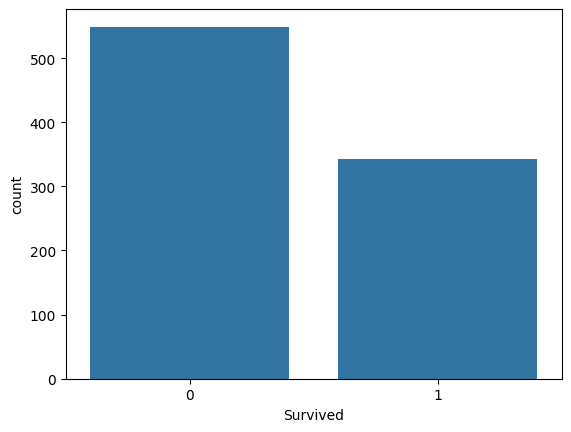

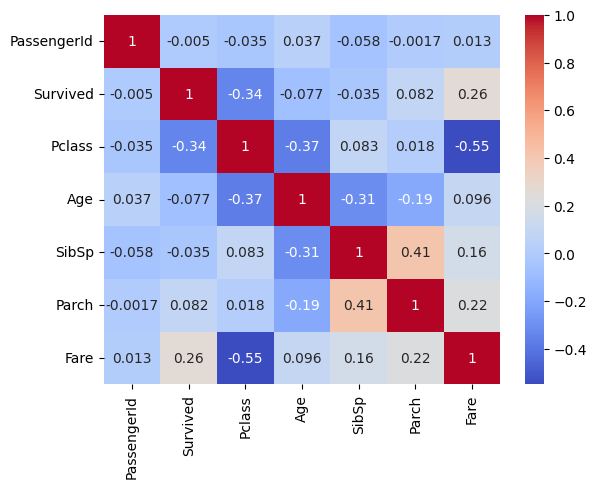

In [102]:
# Explore data using visualizations
sns.countplot(x='Survived', data=titanic_data)
plt.show()

# Explore relationships between features and target
sns.heatmap(titanic_data.corr(), annot=True, cmap='coolwarm')
plt.show()

# Handle missing values

In [103]:
# Handle missing values
titanic_data = titanic_data.drop(['Cabin', 'Name', 'Ticket', 'Embarked'], axis=1)  # Drop columns with many missing values
titanic_data['Age'].fillna(titanic_data['Age'].median(), inplace=True)  # Fill missing age values with the median

# Encode categorical variables (convert text data into numerical format)
titanic_data['Sex'] = titanic_data['Sex'].map({'male': 0, 'female': 1})

# Split the data into features (X) and target variable (y)
X = titanic_data.drop('Survived', axis=1)
y = titanic_data['Survived']



In [104]:
# Build a Random Forest Classifier model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

# model training

In [105]:
from sklearn.model_selection import train_test_split

# Split the data into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [106]:
from sklearn.tree import DecisionTreeClassifier

# Create a Decision Tree model
model = DecisionTreeClassifier(random_state=42)

# Train the model on the training data
model.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

# model prediction

In [119]:
# Make predictions on the test set
predictions = model.predict(X_test)
print(predictions)



[0 1 1 1 0 1 1 0 0 1 0 0 0 0 0 1 1 0 0 0 0 1 0 0 0 0 1 0 1 1 0 0 0 0 0 1 1
 0 1 0 0 1 1 0 1 0 0 0 0 1 1 1 0 0 0 1 0 1 0 1 0 1 1 0 0 1 0 1 0 1 1 1 0 1
 0 0 0 1 1 1 0 1 1 0 0 0 1 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 1 0 1 0 0 1 1
 0 1 0 0 0 0 1 1 0 0 1 1 1 0 0 1 0 0 0 1 0 0 1 1 1 1 1 0 0 0 1 0 0 0 1 0 1
 1 0 0 0 0 0 0 0 1 1 1 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0]


In [120]:
print(y_test)

709    1
439    0
840    0
720    1
39     1
      ..
433    0
773    0
25     1
84     1
10     1
Name: Survived, Length: 179, dtype: int64


In [121]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.83


# import warnings

In [129]:
import warnings

# Ignore warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Evaluate the model
accuracy = accuracy_score(y_test, predictions)
conf_matrix = confusion_matrix(y_test, predictions)
classification_rep = classification_report(y_test, predictions)

print(f"Accuracy: {accuracy}")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Classification Report:\n{classification_rep}")


Accuracy: 0.7430167597765364
Confusion Matrix:
[[84 21]
 [25 49]]
Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.80      0.79       105
           1       0.70      0.66      0.68        74

    accuracy                           0.74       179
   macro avg       0.74      0.73      0.73       179
weighted avg       0.74      0.74      0.74       179

